a)	Determine what percentage of vehicles will pay the penalty?(1 mark)

b) If the limit of allowed load is decreased to 13 tonnes, what percentage of vehicles do not pay the penalty? (2 marks) 

c) What should be the load limit that atleast 5% of the vehicles will face penalties? (2 marks)


In [84]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

a) Determine what percentage of vehicles will pay the penalty?(1 mark)

In [12]:
mean = 12
std = 1.2
maxx = 13.5
z = (maxx - mean) / std
print('Percentage that do pay penalty:',round(stats.norm.sf(z) * 100,2))

Percentage that do pay penalty: 10.56


b) If the limit of allowed load is decreased to 13 tonnes, what percentage of vehicles do not pay the penalty? (2 marks)

In [11]:
new_max = 13
new_z = (new_max - mean) / std
print('Percentage that do not pay penalty:', round(stats.norm.cdf(new_z)* 100,3))

Percentage that do not pay penalty: 79.767


c) What should be the load limit that atleast 5% of the vehicles will face penalties? (2 marks)

In [38]:
new = (15.09 - mean) / std
print(stats.norm.sf(new))
print('Thus new limit must be close to 15.09')

0.005012004331761333
Thus new limit must be close to 15.09


<b>A.Frame Null and Alternate Hypothesis ( 1 Mark)</b>

Null Hypothesis :  weight lost >= 5

Alternate Hypothesis: weight lost < 5

<b>B.State which tail test to be performed (1 Mark)</b>

Since in this case we are trying to test the Alternate Hypothesis that the weight is less than 5 kg, we will use the left tailed test.

<b>C.Find the test statistic (2 Mark)</b>

In [51]:
n = 29
sample_m = 6.7
pop_m = 5
pop_std = 1.3
alpha = 0.05
z = (sample_m - pop_m)/(pop_std / np.sqrt(n))
pval = stats.norm.sf(z)
print('Test Statistic Z :', z, '\nP-Value:', pval)

Test Statistic Z : 7.042138593945121 
P-Value: 9.465568994053133e-13


<b>D.Interpret the results (1 Mark)</b>

In [46]:
if pval >=  alpha:
    print('We accept the null')
else:
    print('We fail to accept the Null. Alternate Accepted')

We fail to accept the Null. Alternate Accepted


Here, since the P-Value is so significantly small, we accept the alternate. With this we can cocnlude that the claim by the company that the people lost atleast 5Kgs is true.

 _________________

Null Hypothesis : There is no difference among the group means and temperature does not eeffect the curation of cement.

Alternate Hypothesis : There is a significant difference among the group means and there is an effect on temperature on the curation of cement.

<b> ii) Determine the Statistical Test and give the reason for the selection of the test.</b>

In this case, we use the One Way ANOVA Test. This is for a multitude of reasons, they are:
           - we need to assess the difference of numerical means and variances of more than two groups. Thus the T-Test                  would be tedious and long process.
           - we need to compare only one identity i.e. temperature and not two or more. Thus we use the one way anova. 
           - Equal variances and normal distribution makes this data suitable for a parametric anova test.

<b> iii) Find the test statistics and pvalue.</b>

In [58]:
small = np.array([12,8,11,12,14,8,9,11,12,11.5,10.5,10.5])
medium = np.array([9,7,6,8,4,6,7,7,7,8,8])
large = np.array([6,5,5,4,8,7,6,2,4,3,4,5])

stat, pval = stats.f_oneway(small,medium,large)
print('F-Distribution Test Statistic:', stat, '\nP-Value:',pval)

F-Distribution Test Statistic: 40.910677596019625 
P-Value: 1.523419880399115e-09


<b>iv) Interpret the Results</b>

In [59]:
if(pval<0.05):
    print('We accept the Alternate Hypothesis')

We accept the Alternate Hypothesis


Here, since the P-Value is less than 0.05% significance level, we can say that the means of the three groups actually differ. This means that temperature indeed does play a role in the way and speed with which cement is curated.

<b>v) If strength differs. Find at which temperature strength differs</b>

In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df= pd.DataFrame({'strength':[12,8,11,12,14,8,9,11,12,11.5,10.5,10.5,
                             9,0,7,6,8,4,6,7,7,7,8,8,
                             6,5,5,4,8,7,6,2,4,3,4,5],
                 'group' : np.repeat(['low','medium','high'], repeats = 12)})
tukey = pairwise_tukeyhsd(endog = df['strength'],
                         groups = df['group'],
                         alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  high    low    5.875  0.001  3.9019  7.8481   True
  high medium      1.5 0.1649 -0.4731  3.4731  False
   low medium   -4.375  0.001 -6.3481 -2.4019   True
----------------------------------------------------


Here, the p-value for high and medium is at 0.169 where as for the difference of means in comparison of other groups is less than 0.05. This means that except for the difference in means of groups High Temp and Low temp, there is a statistical difference in the means of comparisons of other groups .i.e low and medium , low and high.

 _________________

In [71]:
import pandas as pd
df = pd.read_csv('data_set.csv')
df.head()

,Student_id,Age,Gender,Education,Experience,Designation,Salary
0,1,22,M,Degree,1,Associate,28000
1,2,23,F,Degree,2,Associate,21000
2,3,24,F,Masters,3,Associate,22000
3,4,25,F,Masters,4,Associate,23000
4,5,32,M,Degree,11,Associate,21000


<b> 1.Does Age has any effect on the salary of an individual </b>

In [80]:
print('Normality Test of Age Column:',stats.shapiro(df.Age))
print('Normality Test of Salary Column:',stats.shapiro(df.Salary))

Normality Test of Age Column: ShapiroResult(statistic=0.915911078453064, pvalue=5.037566097598756e-07)
Normality Test of Salary Column: ShapiroResult(statistic=0.8977665305137634, pvalue=4.906928552372847e-08)


Since both columns are continuous in nature and do not have a normal districution, we use the non-parametric correlation test which is the Spearmen's R Correlation Test.

In [83]:
correl_val,pval = stats.spearmanr(df.Age,df.Salary,axis = 1)
print('The correlation between the Age and the Salary Column is:', correl_val)

The correlation between the Age and the Salary Column is: 0.32216735492786996


These two columns have a mild positive correlation and their correlation co-efficient is 0.322. This means that when one rises or falls by 1 unit the other will rise or fall 0.322 units respectively and vice versa.

This mild positive correlation is not very significant.

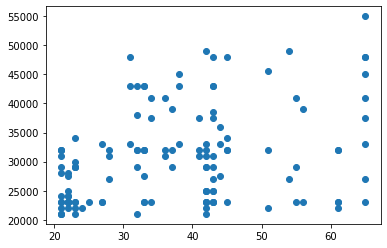

In [85]:
plt.scatter(df.Age,df.Salary)

<b> 2.Does Education has any effect on the salary of an individual </b> 

In [88]:
degree = df[df.Education == 'Degree'].Salary
masters = df[df.Education == 'Masters'].Salary
phd = df[df.Education == 'PHD'].Salary

In [89]:
#Normality Test for all Three
# Null : They are normal
# Alternate they are not
stat1,pval1 = stats.shapiro(degree)
stat2,pval2 = stats.shapiro(masters)
stat3,pval3 = stats.shapiro(phd)
print('Degree Data Normality:', pval1,
     '\nMasters Data Normality:', pval2,
     '\nPHD Data Normality:',pval3)

Degree Data Normality: 7.884184014983475e-06 
Masters Data Normality: 0.00041357750887982547 
PHD Data Normality: 0.13604678213596344


Here, only the PHD Data is normal, we thus go for a non-parametric ANOVA Test which is the Kruskal Wallis H Test. 
This tests the null hypothesis that the median of the three groups is similar .i.e drawn from the same population.

In [93]:
stat,pval = stats.kruskal(degree,masters,phd)
if(pval < 0.05):
    print('We fail to accept the null. Alternate Accepted','\nP Value:',pval)

We fail to accept the null. Alternate Accepted 
P Value: 0.007945431290086086


Since, the Pvalue is less than 0.05, we reject the null that would imply there is no difference in the salaries of the differenctly educated and we find that the education does have and impact on the salary of a person. 

<b> 3.Does Designation has any effect on the salary of an individual </b>

In [104]:
roles = df.Designation.value_counts().index
asc = df[df.Designation == roles[0]].Salary
man = df[df.Designation == roles[1]].Salary
sen = df[df.Designation == roles[2]].Salary
pro = df[df.Designation == roles[3]].Salary
wha = [asc,man,sen,pro]

In [98]:
print('Normality Test for All')
print('Normality for Associate: ', stats.shapiro(asc))
print('Normality for Manager: ', stats.shapiro(man))
print('Normality for Senior Manager: ', stats.shapiro(sen))
print('Normality for Assicate Professor: ', stats.shapiro(pro))

Normality Test for All
Normality for Associate:  ShapiroResult(statistic=0.8455919027328491, pvalue=2.2635426830674987e-06)
Normality for Manager:  ShapiroResult(statistic=0.8873010277748108, pvalue=0.0021545065101236105)
Normality for Senior Manager:  ShapiroResult(statistic=0.9216136932373047, pvalue=0.07214382290840149)
Normality for Assicate Professor:  ShapiroResult(statistic=0.9171408414840698, pvalue=0.17420418560504913)


Since only 2 out of the 4 are normal, we the the Kruskal Wallis H Test, which is the non-parametric ANOVA Test.

In [101]:
stat,pval = stats.kruskal(asc,man,sen,pro)
if(pval<0.05):
    print('We reject the null and accept the alternate','\nP Value:',pval)

We reject the null and accept the alternate 
P Value: 0.006231201352471838


Here, we can conclude that Designation Infact does effect Salary.

In [127]:
import scikit_posthocs as sp
sp.posthoc_dunn(wha,p_adjust = ' bonferroni')

In the Above cell I tried doing a post-hoc test for the Kruskal Wallis ANOVA Test but could not as Jupyter Notebooks is not able to import scikit_posthocs. 

<b> 4.Does salary effected by gender of an individual. </b>

In [113]:
male = df[df.Gender == 'M'].Salary
female = df[df.Gender == 'F'].Salary

In [114]:
#normailty Test
print('Normality of male Data: ', stats.shapiro(male))
print('Normality of female Data: ', stats.shapiro(female))

Normality of male Data:  ShapiroResult(statistic=0.894479513168335, pvalue=0.00010809693776536733)
Normality of female Data:  ShapiroResult(statistic=0.8925539255142212, pvalue=1.2230276297486853e-05)


Both Data sets are not normal. We then use the non parametric Kruskal Wallis H Test since the data is <b>not of equal lenght</b>. We would have otherwise used the non-parametric T-Test which is the Wilcoxon test.

In [120]:
stat,pval = stats.kruskal(male,female)
if(pval>0.05):
    print('We accept the null','\nP Value:',pval)

We accept the null 
P Value: 0.5334032230979215


Since the medians of the two groups are similar and we accept the null, we can conclude that the Gender of an Emplpyee does not effect their salary. This has been proven by the Kruskal Test

<b> 5.Does salary effected by experience of an individual.</b>

In [125]:
print('Normality Test for Experience Column:' , stats.shapiro(df.Experience))
print('Normality Test for Salary Column:' , stats.shapiro(df.Salary))

Normality Test for Experience Column: ShapiroResult(statistic=0.9159107208251953, pvalue=5.037321670897654e-07)
Normality Test for Salary Column: ShapiroResult(statistic=0.8977665305137634, pvalue=4.906928552372847e-08)


Here, as visible, both the columns are not normal. We therefore have to go for a non-parametric test.
Since, both the columns are continuous in nature we go for the Spearman's R Correlation Test.

In [126]:
stat,pval = stats.spearmanr(df.Experience,df.Salary)
print("Spearman's Coefficient of Correlation is:", stat)

Spearman's Coefficient of Correlation is: 0.32216735492786996


These two columns have a mild positive correlation and their correlation co-efficient is 0.322. This means that when one rises or falls by 1 unit the other will rise or fall 0.322 units respectively and vice versa.

This mild positive correlation is not very significant.

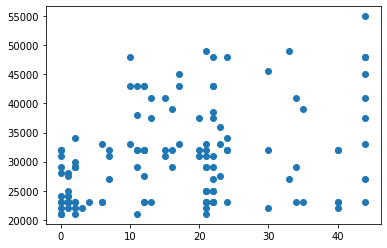

In [128]:
plt.scatter(df.Experience,df.Salary)